<a href="https://colab.research.google.com/github/damitkumar11/-Financial-Data-EDA-Data-Analytics-Python-/blob/main/datas_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = 'financial-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4363947%2F7494625%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240128%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240128T145113Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5790d54959c045388349388ece8d28e2b585e536cb1cc8bcb3d5318c1357eb1eafd9b721fa849dc268c1048141b2a3952337ee067ae41bd14f7f6ff4096f226a01ffa014cc6bddbdd0378b1e777b9a56776bc7e83011bf3f442cc9e2c6885a9b28a779559d140c45fffbdad0741ea1eb8fd33c782fa0c42f17e9e8be4bf738fe2ff313fcdfce1990b2058a0adbcd278f3cab1f6b4e01bd3aa77c7e4c176918358b176251d26280558c92cab1c98d2751db3621117b17425243e6fc6e072831045a73f53d9b1f3cb2143850eb54e712975e1a95b68c965839b52308a11ccff792f6807ff70e4118949a03c1a0d839af57a982ef3e811abb45efde4e61609aa98f'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "Downloading and uncompressing: financial-data"
[1] "Downloaded and uncompressed: financial-data"
[1] "Data source import complete"


In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "financial-data"

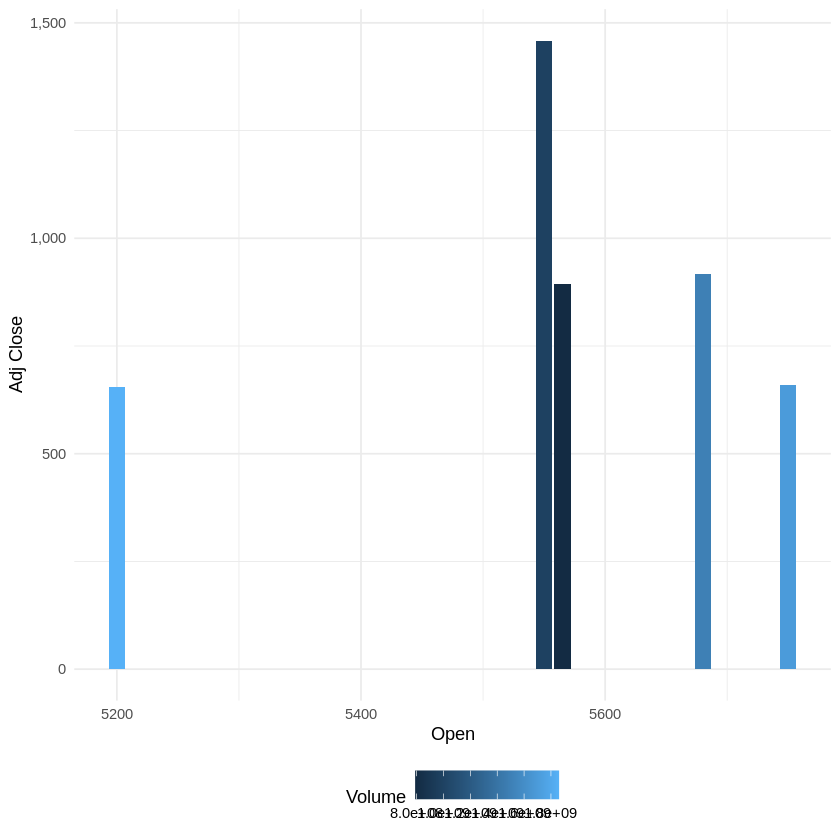

In [3]:
# Instale o pacote ggplot2 se ainda não estiver instalado
# install.packages("ggplot2")

# Carregue a biblioteca ggplot2
library(ggplot2)

# Dados
open <- c(5200.0, 5680.0, 5565.0, 5550.0, 5750.0)
adj_close <- c(513.277, 392.578, 502.346, 923.828, 50.189, 140.625, 523.752, 392.578, 534.974, 609.375)
volume <- c(1859122000, 1493339500, 790477000, 989206000, 1700900500)

# Criar um dataframe com os dados
dados <- data.frame(Open = open, Adj_Close = adj_close, Volume = volume)

# Criar o gráfico de barras
ggplot(dados, aes(x = Open, y = Adj_Close, fill = Volume)) +
  geom_bar(stat = "identity") +
  scale_y_continuous(labels = scales::comma) +  # Formata os rótulos do eixo y com vírgulas
  labs(x = "Open", y = "Adj Close", fill = "Volume") +  # Rótulos dos eixos
  theme_minimal() +  # Estilo do tema
  theme(legend.position = "bottom")  # Posição da legenda


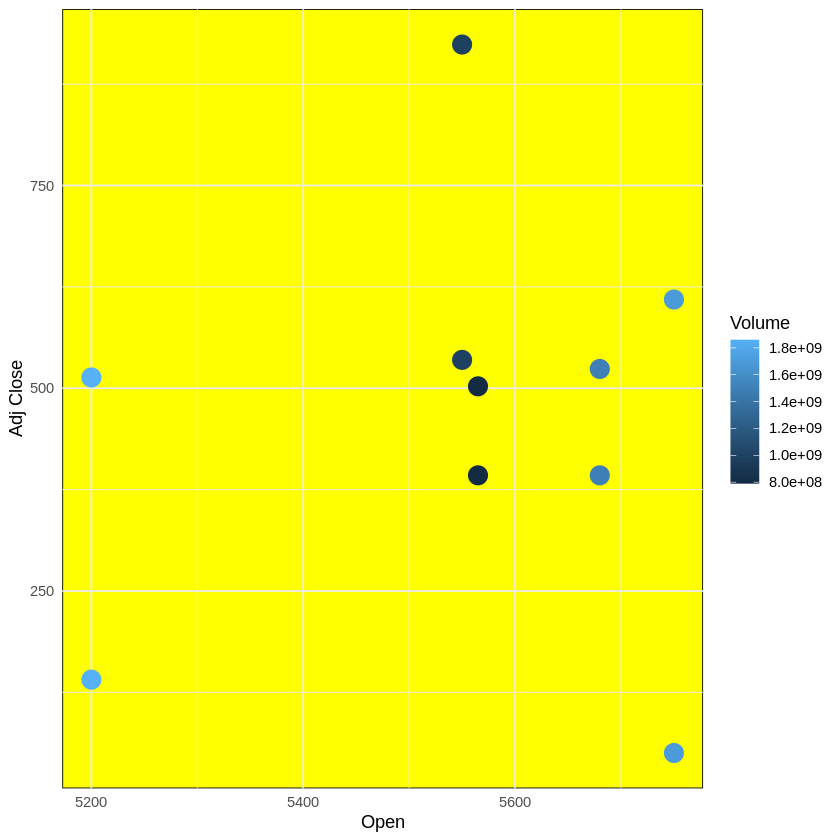

In [4]:
# Carregue a biblioteca ggplot2
library(ggplot2)

# Dados
open <- c(5200.0, 5680.0, 5565.0, 5550.0, 5750.0)
adj_close <- c(513.277, 392.578, 502.346, 923.828, 50.189, 140.625, 523.752, 392.578, 534.974, 609.375)
volume <- c(1859122000, 1493339500, 790477000, 989206000, 1700900500)

# Criar um dataframe com os dados
dados <- data.frame(Open = open, Adj_Close = adj_close, Volume = volume)

# Criar o gráfico de dispersão com fundo amarelo
ggplot(dados, aes(x = Open, y = Adj_Close, color = Volume)) +
  geom_point(size = 5) +  # Tamanho dos pontos
  scale_y_continuous(labels = scales::comma) +  # Formata os rótulos do eixo y com vírgulas
  labs(x = "Open", y = "Adj Close", color = "Volume") +  # Rótulos dos eixos
  theme_minimal() +  # Estilo do tema
  theme(panel.background = element_rect(fill = "yellow"))  # Fundo amarelo


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


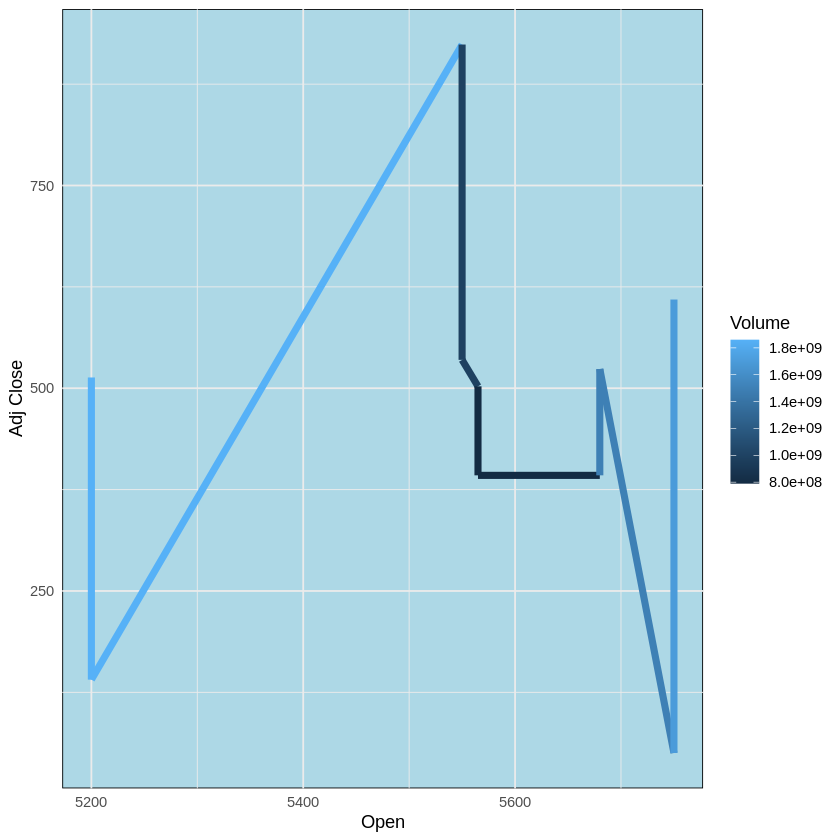

In [5]:
# Carregue a biblioteca ggplot2
library(ggplot2)

# Dados
open <- c(5200.0, 5680.0, 5565.0, 5550.0, 5750.0)
adj_close <- c(513.277, 392.578, 502.346, 923.828, 50.189, 140.625, 523.752, 392.578, 534.974, 609.375)
volume <- c(1859122000, 1493339500, 790477000, 989206000, 1700900500)

# Criar um dataframe com os dados
dados <- data.frame(Open = open, Adj_Close = adj_close, Volume = volume)

# Criar o gráfico de linhas com fundo azul
ggplot(dados, aes(x = Open, y = Adj_Close, color = Volume)) +
  geom_line(size = 2) +  # Espessura das linhas
  scale_y_continuous(labels = scales::comma) +  # Formata os rótulos do eixo y com vírgulas
  labs(x = "Open", y = "Adj Close", color = "Volume") +  # Rótulos dos eixos
  theme_minimal() +  # Estilo do tema
  theme(panel.background = element_rect(fill = "lightblue"))  # Fundo azul


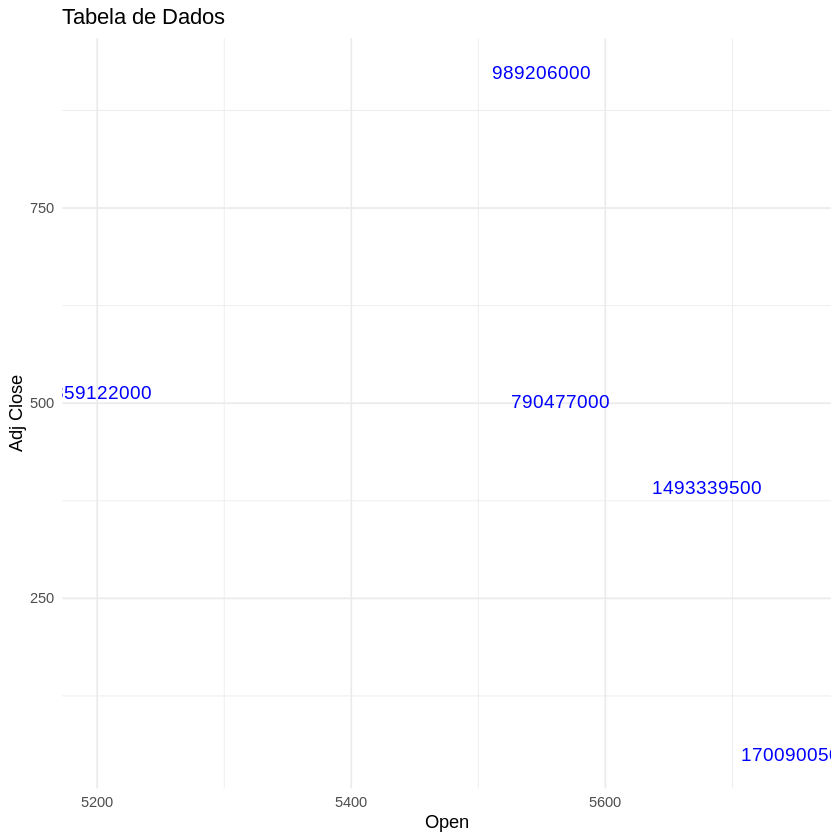

In [6]:
# Carregue a biblioteca ggplot2
library(ggplot2)

# Dados
open <- c(5200.0, 5680.0, 5565.0, 5550.0, 5750.0)
adj_close <- c(513.277, 392.578, 502.346, 923.828, 50.189)
volume <- c(1859122000, 1493339500, 790477000, 989206000, 1700900500)
labels <- c("1859122000", "1493339500", "790477000", "989206000", "1700900500")

# Criar um dataframe com os dados
dados <- data.frame(Open = open, Adj_Close = adj_close, Volume = volume, Labels = labels)

# Criar o gráfico
ggplot(dados, aes(x = Open, y = Adj_Close, label = Labels)) +
  geom_text(color = "blue", size = 4) +
  labs(x = "Open", y = "Adj Close", title = "Tabela de Dados") +
  theme_minimal()
